<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
#boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


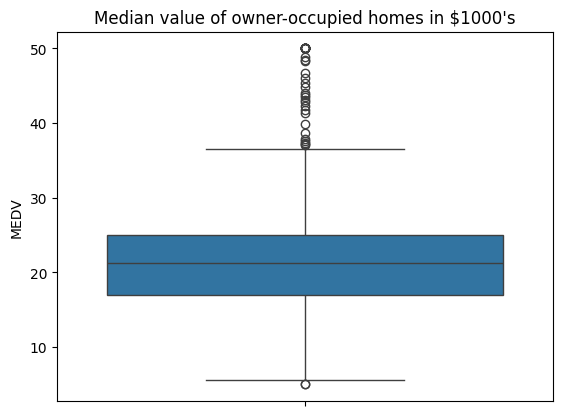

In [5]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df).set_title("Median value of owner-occupied homes in $1000's")

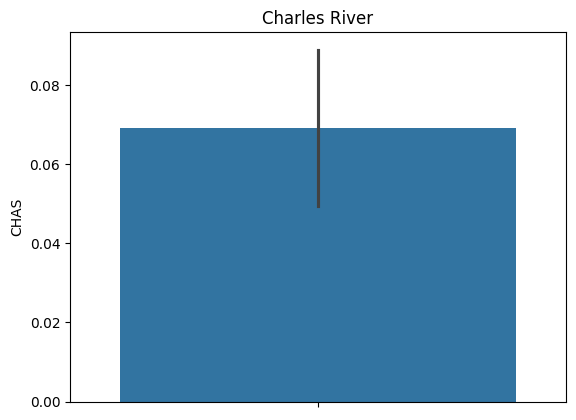

In [6]:
#Provide a  bar plot for the Charles river variable
ax = sns.barplot(y="CHAS", data=boston_df).set_title("Charles River")

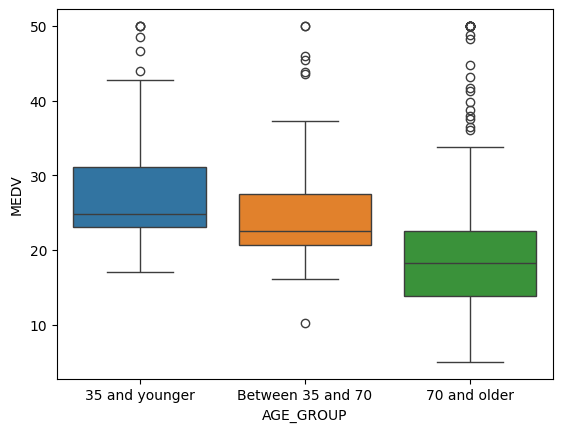

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', 'Between 35 and 70', '70 and older'])

ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, hue='AGE_GROUP')

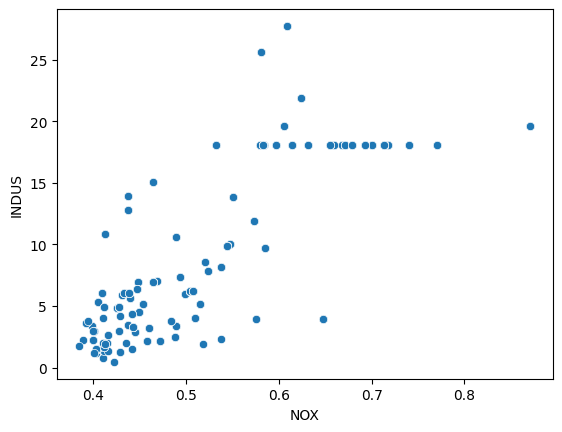

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df) #the relationship looks like it increases linearly and then plateaus

<Axes: xlabel='PTRATIO', ylabel='Count'>

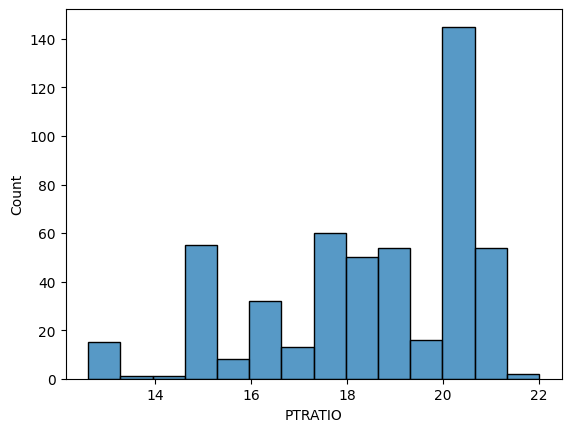

In [9]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(x='PTRATIO', data=boston_df)

In [10]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river
#Alternative Hypothesis: There is a significant difference in median value of houses bounded by the Charles river

medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_nonriver = boston_df[boston_df['CHAS'] == 0]['MEDV']

scipy.stats.ttest_ind(medv_river, medv_nonriver, equal_var=True)
#p<0.05, thus, there is a significant difference in median value of houses bounded by the Charles river

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [11]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Null Hypothesis: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
#Alternative Hypothesis: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 40, 70, 100], labels=['<40', '40-70', '70+'], right=False)
boston_df[['AGE','AGE_GROUP']].head()

group1 = boston_df[boston_df['AGE_GROUP'] == '<40']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '40-70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70+']['MEDV']

scipy.stats.f_oneway(group1, group2, group3)
#p<0.05, There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

F_onewayResult(statistic=30.3452736699156, pvalue=4.178032127262331e-13)

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241532e-98)

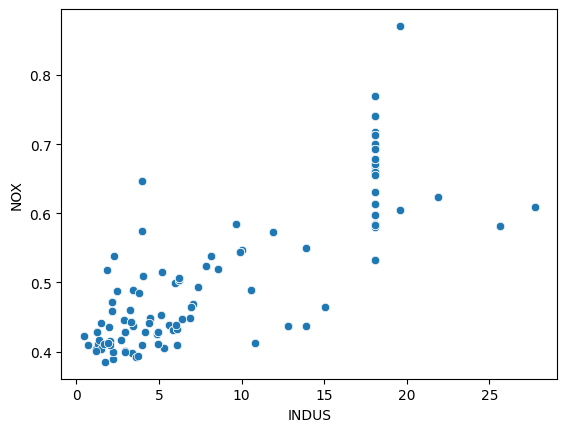

In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#Alternative Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#p<0.05, thus there is a relationship between NOX and INDUS

In [ ]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#Null Hypothesis: The effect is not statistically significant
#Alternative Hypothesis: The effect is statistically significant
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()
#p<0.05, the effect is statistically significant
#For each 1 unit increase in distance from employment centers, MEDV increases by ~$1,091

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        20:10:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""